In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
path2csv = './csv/'
path2plots = './plots/convergence/'

In [73]:
def csv_to_df(path2csv):
    dff_all_from_csv = []
    print(path2csv)
    
    for root, dirs, files in os.walk(path2csv):
        print(root, files)
        for file in files:
            if not file.endswith('.csv'):
                continue
            df = pd.read_csv(os.path.join(root, file), skiprows=range(0,6))
            df.set_index(['[run number]', '[step]'], inplace=True)
            dff_all_from_csv.append(df)
    return dff_all_from_csv

In [74]:
dff_all_from_csv = csv_to_df(path2csv)

./csv/
./csv/ ['Language Change_converge_stop experiment8-reward-alpha-table.csv', 'Language Change_converge_stop experiment1-individual-perc-table.csv', 'Language Change_converge_stop experiment3-threshold-perc-table.csv', 'Language Change_converge_stop experiment2-threshold-perc-thres-table.csv', 'Language Change_converge_stop experiment4-reward-perc-table.csv', 'Language Change_converge_stop experiment6-threshold-sink-state-table.csv', 'Language Change_converge_stop experiment5-threshold-thres-table.csv', 'Language Change_converge_stop experiment7-reward-logistic-table.csv']


In [75]:
dff_all_from_csv[0]

logistic?  alpha update-algorithm  num-nodes  \
[run number] [step]                                                 
7            0            True  0.000           reward        100   
             1            True  0.000           reward        100   
             2            True  0.000           reward        100   
             3            True  0.000           reward        100   
9            0            True  0.000           reward        100   
...                        ...    ...              ...        ...   
57           19996        True  0.025           reward        100   
             19997        True  0.025           reward        100   
             19998        True  0.025           reward        100   
             19999        True  0.025           reward        100   
             20000        True  0.025           reward        100   

                     percent-grammar-1  sink-state-1?  threshold-val  \
[run number] [step]                                                    
7            0                      60           True            0.3   
             1                      60           True            0.3   
             2                      60           True            0.3   
             3                      60           True            0.3   
9            0                      60           True            0.3   
...                                ...            ...            ...   
57           19996                  60           True            0.3   
             19997                  60           True            0.3   
             19998                  60           True            0.3   
             19999                  60           True            0.3   
             20000                  60           True            0.3   

                     final-grammar1-distribution  
[run number] [step]                               
7            0                          0.600000  
             1                          0.599903  
             2                          0.599056  
             3                          0.598727  
9            0                          0.600000  
...                                          ...  
57           19996                      0.944550  
             19997                      0.944605  
             19998                      0.944561  
             19999                      0.944510  
             20000                      0.944457  

[524543 rows x 8 columns]

In [78]:
def plot_err_bars(df):
    infection_type = df['update-algorithm'].iloc[0]
    if infection_type == 'individual' or infection_type == 'threshold':
        params = ['threshold-val', 'percent-grammar-1']
    else:
        params = ['alpha', 'logistic?']
    print(params)
    for p in params:
        vals, counts = np.unique(df[p], return_counts=True)
        if len(vals) == 1:
            continue

        temp_df = df.reset_index(inplace=False).groupby([p, "[run number]"]).max()["final-grammar1-distribution"]
        display_df = temp_df.reset_index(inplace=False).groupby(p).agg({'final-grammar1-distribution': ['mean', 'min', 'max', 'std']})
        display(display_df)
        fig, ax = plt.subplots()
        ax.errorbar(display_df.index.values, display_df['final-grammar1-distribution']['mean'], yerr=display_df['final-grammar1-distribution']['std'], fmt='o')
        ax.set_xlabel(p)
        ax.set_ylabel('final-grammar1-distribution')
        ax.set_ylim(0, 1.05)
        plt.title(infection_type)
        plt.show()

new experiment
['alpha', 'logistic?']


final-grammar1-distribution                              
                             mean       min       max       std
alpha                                                          
0.000                    0.846916  0.626868  0.989887  0.117173
0.005                    0.963545  0.931345  0.989960  0.021593
0.010                    0.962050  0.902704  0.989998  0.037151
0.015                    0.982393  0.946231  0.989972  0.016152
0.020                    0.989946  0.989900  0.989992  0.000031
0.025                    0.985719  0.947556  0.989998  0.013409
0.030                    0.989941  0.989900  0.989974  0.000022
0.035                    0.989937  0.989901  0.989990  0.000029
0.040                    0.989946  0.989912  0.989988  0.000026
0.045                    0.989947  0.989906  0.989973  0.000020
0.050                    0.989942  0.989897  0.989990  0.000036

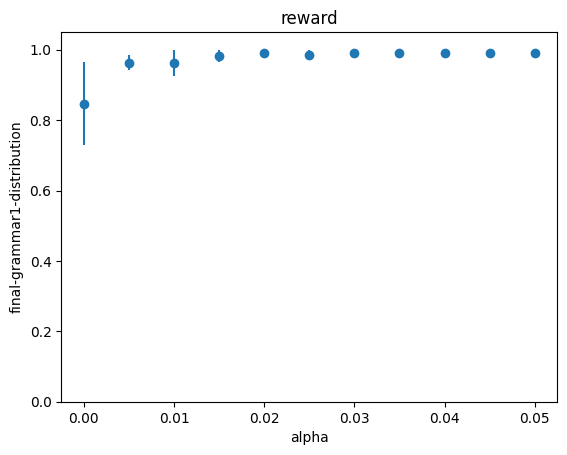

new experiment
['threshold-val', 'percent-grammar-1']


final-grammar1-distribution                      
                                         mean   min   max       std
percent-grammar-1                                                  
10                                      0.293  0.10  0.99  0.319480
20                                      0.434  0.20  0.98  0.317707
30                                      0.785  0.30  0.99  0.257650
40                                      0.787  0.40  0.99  0.264787
50                                      0.718  0.50  0.99  0.202364
60                                      0.925  0.68  0.99  0.109975
70                                      0.862  0.70  0.99  0.137744
80                                      0.982  0.96  0.99  0.010328
90                                      0.970  0.90  0.99  0.029059

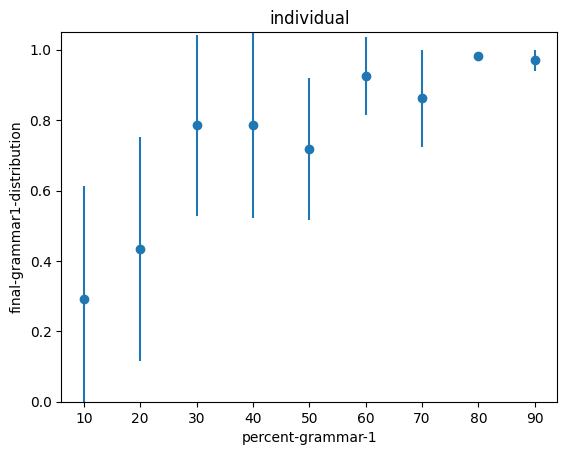

new experiment
['threshold-val', 'percent-grammar-1']


final-grammar1-distribution                      
                                         mean   min   max       std
percent-grammar-1                                                  
10                                      0.282  0.13  0.46  0.103902
20                                      0.666  0.46  0.89  0.141358
30                                      0.919  0.82  0.99  0.052164
40                                      0.947  0.86  0.99  0.039735
50                                      0.957  0.90  0.99  0.029833
60                                      0.957  0.88  0.99  0.036530
70                                      0.971  0.93  0.99  0.019120
80                                      0.908  0.80  0.99  0.093429
90                                      0.917  0.90  0.99  0.035917

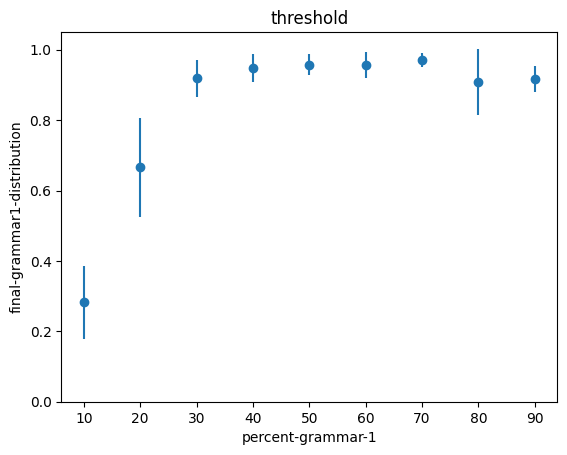

new experiment
['threshold-val', 'percent-grammar-1']


final-grammar1-distribution                      
                                     mean   min   max       std
threshold-val                                                  
0.1                              0.954000  0.70  0.99  0.055684
0.2                              0.913889  0.27  0.99  0.115045
0.3                              0.850111  0.15  0.99  0.220762
0.4                              0.775889  0.17  0.99  0.268792
0.5                              0.763889  0.13  0.99  0.266748
0.6                              0.668778  0.12  0.99  0.288416
0.7                              0.642889  0.10  0.99  0.287657
0.8                              0.641000  0.10  0.99  0.279466
0.9                              0.632778  0.11  0.98  0.282019

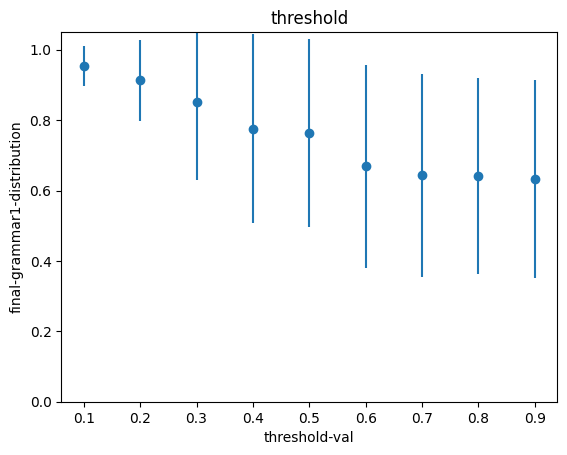

final-grammar1-distribution                      
                                         mean   min   max       std
percent-grammar-1                                                  
10                                   0.335556  0.10  0.99  0.289599
20                                   0.517111  0.22  0.99  0.280766
30                                   0.662222  0.32  0.99  0.230265
40                                   0.773778  0.45  0.99  0.186262
50                                   0.850444  0.62  0.99  0.123888
60                                   0.891111  0.70  0.99  0.085163
70                                   0.935778  0.70  0.99  0.054070
80                                   0.940889  0.80  0.99  0.068641
90                                   0.936333  0.90  0.99  0.041555

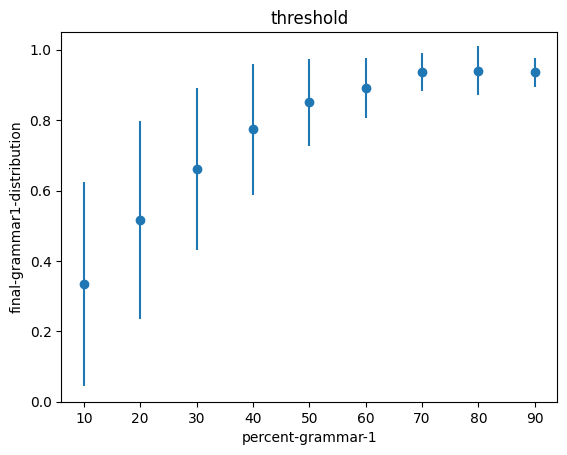

new experiment
['alpha', 'logistic?']
new experiment
['threshold-val', 'percent-grammar-1']
new experiment
['threshold-val', 'percent-grammar-1']


final-grammar1-distribution                      
                                     mean   min   max       std
threshold-val                                                  
0.1                                 0.970  0.93  0.99  0.021602
0.2                                 0.955  0.90  0.99  0.029155
0.3                                 0.958  0.92  0.99  0.029740
0.4                                 0.951  0.89  0.97  0.027669
0.5                                 0.974  0.94  0.99  0.020111
0.6                                 0.870  0.76  0.98  0.064118
0.7                                 0.813  0.71  0.89  0.062013
0.8                                 0.813  0.72  0.89  0.050783
0.9                                 0.802  0.70  0.91  0.052451

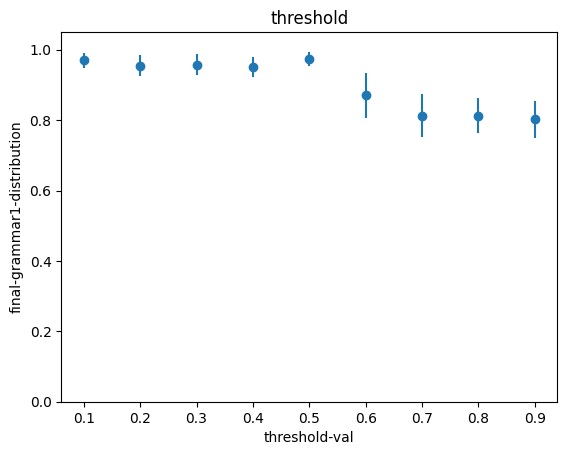

new experiment
['alpha', 'logistic?']


final-grammar1-distribution                              
                                 mean       min       max       std
logistic?                                                          
False                        0.989934  0.989899  0.989984  0.000028
True                         0.989950  0.989863  0.989997  0.000047

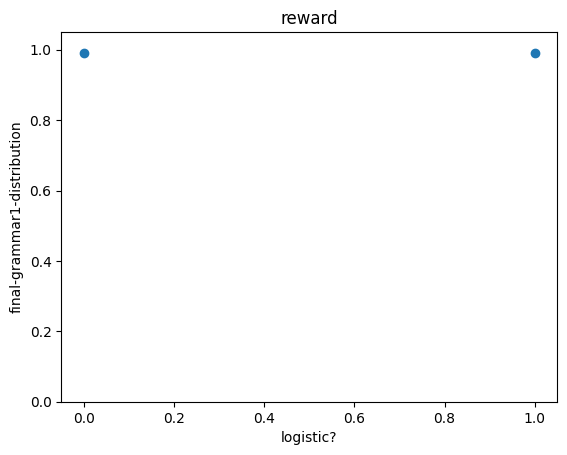

In [79]:
for experiment_df in dff_all_from_csv:
    # check whether combinatorial experiment worked
    print("new experiment")
    plot_err_bars(experiment_df)

when error bars are close to 1.0, one can see that a bias towards one was used.